In [148]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import requests
import json
from scipy import stats
from config import geoapify_key
from citipy import citipy

In [170]:
# File to Load
main_causes_death = pd.read_csv("Resources/casuse of death world_new.csv")
age_group = pd.read_csv("Resources/age-group.csv")
risk_factor = pd. read_csv("Resources/risk-factor.csv")


,Country,Code,Year,Executions,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Chronic kidney disease,Poisonings,Protein-energy malnutrition,Terrorism,Road incidents,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Afghanistan,AFG,2019,NaN,1563.0,1775.0,560.0,1244.0,530.0,1687.0,...,5637.0,525.0,1210.0,NaN,8254.0,7082.0,3797.0,6929.0,485.0,1940.0
1,Afghanistan,AFG,2018,NaN,1576.0,1757.0,551.0,1279.0,466.0,1669.0,...,5531.0,514.0,1245.0,NaN,8095.0,7036.0,3732.0,6861.0,475.0,1972.0
2,Afghanistan,AFG,2017,NaN,1665.0,1728.0,537.0,1367.0,399.0,1723.0,...,5419.0,512.0,1332.0,6092.0,8013.0,6982.0,3693.0,6841.0,476.0,2046.0
3,Afghanistan,AFG,2016,6,1795.0,1690.0,524.0,1452.0,388.0,1742.0,...,5296.0,504.0,1416.0,6142.0,7866.0,6894.0,3578.0,6673.0,471.0,2044.0
4,Afghanistan,AFG,2015,1,1821.0,1652.0,511.0,1505.0,284.0,1730.0,...,5153.0,496.0,1469.0,6216.0,7730.0,6835.0,3492.0,6555.0,463.0,2065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278,Zimbabwe,ZWE,2017,NaN,1460.0,781.0,223.0,2990.0,2116.0,818.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
6279,Zimbabwe,ZWE,2018,NaN,1450.0,795.0,227.0,2918.0,2088.0,825.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0
6280,Zimbabwe,ZWE,2019,NaN,1450.0,812.0,232.0,2884.0,2068.0,827.0,...,2292.0,405.0,2855.0,NaN,2554.0,2891.0,2065.0,4437.0,662.0,136.0
6281,Zimbabwe,ZWE,1991,NaN,1179.0,476.0,129.0,2010.0,3111.0,534.0,...,946.0,283.0,1988.0,0.0,1977.0,1835.0,1476.0,2689.0,368.0,162.0


In [150]:
main_causes_death.columns = [i.split("(")[0].strip() for i in main_causes_death.columns]

In [151]:
main_causes_death.iloc[:,2:] = main_causes_death.iloc[:,2:].replace({np.nan: 0})

In [152]:
main_causes_death.iloc[:,4:] = main_causes_death.iloc[:,4:].astype(int)
main_causes_death

,Country,Code,Year,Executions,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Chronic kidney disease,Poisonings,Protein-energy malnutrition,Terrorism,Road incidents,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Afghanistan,AFG,2019,0,1563,1775,560,1244,530,1687,...,5637,525,1210,0,8254,7082,3797,6929,485,1940
1,Afghanistan,AFG,2018,0,1576,1757,551,1279,466,1669,...,5531,514,1245,0,8095,7036,3732,6861,475,1972
2,Afghanistan,AFG,2017,0,1665,1728,537,1367,399,1723,...,5419,512,1332,6092,8013,6982,3693,6841,476,2046
3,Afghanistan,AFG,2016,6,1795,1690,524,1452,388,1742,...,5296,504,1416,6142,7866,6894,3578,6673,471,2044
4,Afghanistan,AFG,2015,1,1821,1652,511,1505,284,1730,...,5153,496,1469,6216,7730,6835,3492,6555,463,2065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278,Zimbabwe,ZWE,2017,0,1460,781,223,2990,2116,818,...,2196,398,2962,0,2473,2818,2007,4342,654,144
6279,Zimbabwe,ZWE,2018,0,1450,795,227,2918,2088,825,...,2240,400,2890,0,2509,2849,2030,4377,657,139
6280,Zimbabwe,ZWE,2019,0,1450,812,232,2884,2068,827,...,2292,405,2855,0,2554,2891,2065,4437,662,136
6281,Zimbabwe,ZWE,1991,0,1179,476,129,2010,3111,534,...,946,283,1988,0,1977,1835,1476,2689,368,162


In [153]:
# Top 10 causes of death for Australia in 2019
australia_2019 = pd.DataFrame(main_causes_death.loc[main_causes_death.Country == "Australia"].groupby("Year").sum().loc[2019].sort_values(ascending=False))
top_10_australia = australia_2019.nlargest(10, 2019)
top_10_australia

,2019
Cancers,53700
Cardiovascular diseases,51615
Alzheimer's disease and other dementias,11240
Chronic respiratory diseases,11203
Digestive diseases,6632
Chronic kidney disease,5207
Lower respiratory infections,4269
Diabetes mellitus,4239
Suicide,2898
Parkinson's disease,2403


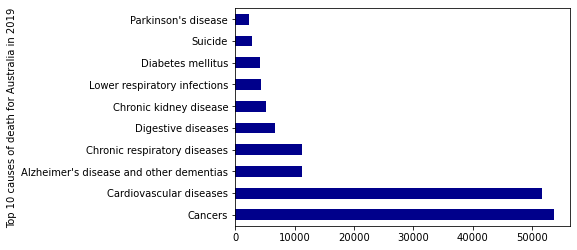

In [154]:
top_10_australia = top_10_australia.plot(kind="barh", title= "", legend=False, color= "darkblue")
top_10_australia.set_ylabel("Top 10 causes of death for Australia in 2019")
plt.show()


In [155]:
main_causes_death.columns

Index(['Country', 'Code', 'Year', 'Executions', 'Meningitis',
       'Alzheimer's disease and other dementias', 'Parkinson's disease',
       'Nutritional deficiencies', 'Malaria', 'Drowning',
       'Interpersonal violence', 'Maternal disorders', 'HIV/AIDS',
       'Drug use disorders', 'Tuberculosis', 'Cardiovascular diseases',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Suicide', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold exposure', 'Cancers',
       'Conflict and terrorism', 'Diabetes mellitus', 'Chronic kidney disease',
       'Poisonings', 'Protein-energy malnutrition', 'Terrorism',
       'Road incidents', 'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Fire, heat, and hot substances', 'Acute hepatitis'],
      dtype='object')

In [156]:
country_suicide = pd.DataFrame(main_causes_death.groupby("Country").sum()["Suicide"].sort_values(ascending=False))
top_100_suicide = country_suicide.nlargest(100, "Suicide")
top_100_suicide

,Suicide
Country,
India,5543395
China,5078550
Russia,1793855
United States,1168886
Japan,861712
...,...
Mali,19059
Niger,18126
Norway,18010


In [157]:
top_100_suicide["Lat"] = ""
top_100_suicide["Lng"] = ""
top_100_suicide

,Suicide,Lat,Lng
Country,,,
India,5543395,,
China,5078550,,
Russia,1793855,,
United States,1168886,,
Japan,861712,,
...,...,...,...
Mali,19059,,
Niger,18126,,
Norway,18010,,


In [161]:
top_100_suicide = top_100_suicide.reset_index()

In [166]:
for idx, row in top_100_suicide.iterrows():
    target_country = row["Country"]
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_country}&format=json&apiKey={geoapify_key}"
    geo_data = requests.get(target_url).json()
    top_100_suicide.loc[idx,"Lat"] = geo_data["results"][0]["lat"]
    top_100_suicide.loc[idx,"Lng"] = geo_data["results"][0]["lon"]

In [167]:
top_100_suicide

,Country,Suicide,Lat,Lng
0,India,5543395,22.3511,78.6677
1,China,5078550,35.0001,105
2,Russia,1793855,64.6863,97.7453
3,United States,1168886,39.7837,-100.446
4,Japan,861712,36.5748,139.239
...,...,...,...,...
95,Mali,19059,16.37,-2.29002
96,Niger,18126,17.7356,9.32384
97,Norway,18010,61.1529,8.78767
98,Bolivia,17950,-17.0569,-64.9912


In [165]:
geo_data["results"][0]

{'datasource': {'sourcename': 'openstreetmap',
  'attribution': '© OpenStreetMap contributors',
  'license': 'Open Database License',
  'url': 'https://www.openstreetmap.org/copyright'},
 'country': 'India',
 'country_code': 'in',
 'lon': 78.6677428,
 'lat': 22.3511148,
 'formatted': 'India',
 'address_line1': 'India',
 'address_line2': '',
 'category': 'administrative',
 'timezone': {'name': 'Asia/Kolkata',
  'offset_STD': '+05:30',
  'offset_STD_seconds': 19800,
  'offset_DST': '+05:30',
  'offset_DST_seconds': 19800,
  'abbreviation_STD': 'IST',
  'abbreviation_DST': 'IST'},
 'result_type': 'country',
 'rank': {'importance': 0.957689135880987,
  'popularity': 0.7910727530603292,
  'confidence': 1,
  'match_type': 'full_match'},
 'place_id': '51ed084c4cbcaa5340593f24d7a8e2593640f00101f9014ca6040000000000c0020b',
 'bbox': {'lon1': 67.9544415,
  'lat1': 6.5531169,
  'lon2': 97.395561,
  'lat2': 35.6745457}}